In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ABOUT DATA

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA. 

The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [2]:
fraud = pd.read_csv('creditcard.csv')
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [56]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


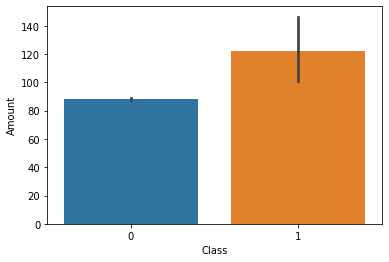

<Figure size 1080x648 with 0 Axes>

In [48]:
sns.barplot(data=fraud,y="Amount",x="Class")
plt.figure(figsize=(15,9))
plt.show()

The higher the transaction the higher the likelihood of a fraud

In [3]:
X = fraud.drop('Class', axis = 1)
X = X.values
X[0:5]

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02,
         2.53634674e+00,  1.37815522e+00, -3.38320770e-01,
         4.62387778e-01,  2.39598554e-01,  9.86979013e-02,
         3.63786970e-01,  9.07941720e-02, -5.51599533e-01,
        -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,
         1.46817697e+00, -4.70400525e-01,  2.07971242e-01,
         2.57905802e-02,  4.03992960e-01,  2.51412098e-01,
        -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,
         6.69280749e-02,  1.28539358e-01, -1.89114844e-01,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01,
         1.66480113e-01,  4.48154078e-01,  6.00176493e-02,
        -8.23608088e-02, -7.88029833e-02,  8.51016549e-02,
        -2.55425128e-01, -1.66974414e-01,  1.61272666e+00,
         1.06523531e+00,  4.89095016e-01, -1.43772296e-01,
         6.35558093e-01,  4.63917041e-01, -1.14804663e-01,
        -1.83361270e-01, -1.45783041e-01, -6.90831352e-

In [5]:
Y =fraud['Class'].values
Y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

THE AIM OF THIS PROJECT IS TO CREATE MODELS THAT CAN BE USED TO PREDICT FRAUD BY A CREDIT CARD

LINEAR REGRESSION


In [6]:
#Importing necessary library

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
#Splitting data into training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [9]:
x_train.shape

(227845, 30)

In [10]:
model.fit(x_train, y_train)

LinearRegression()

In [11]:
model.score(x_test, y_test)

0.5465461922636509

DECISION TREE

In [13]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print("train shape:",x_train.shape,y_train.shape)
print("test shape:",x_test.shape,y_test.shape)

train shape: (227845, 30) (227845,)
test shape: (56962, 30) (56962,)


In [14]:
#Importing the necessary libraries

from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy",max_depth=3)
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
#Creating model prediction
predtree = Tree.predict(x_test)
print(predtree[0:10])
print([y_test[0:10]])

[0 0 0 0 0 0 0 0 0 0]
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)]


In [17]:
#Accuracy score of the model
Tree.score(x_test,y_test)

DecisionTree's Accuracy: 0.9994733330992591


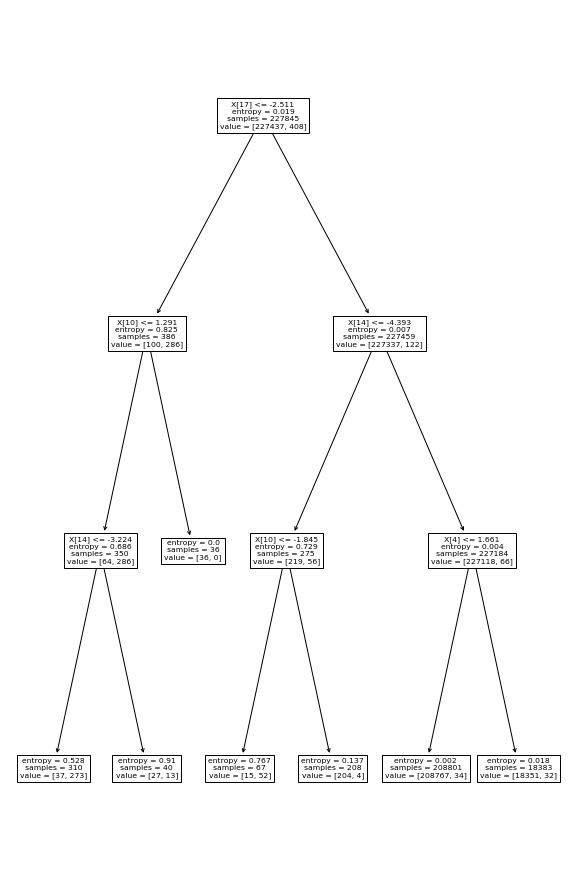

In [18]:
#Visualization of the model
from sklearn.tree import plot_tree
plt.figure(figsize=(10,16))
plot_tree(Tree)
plt.show()

In [20]:
#Normalizing the data

from sklearn import preprocessing
Scale = preprocessing.StandardScaler()
X_data = Scale.fit(X).transform(X.astype (float))
X_data[0:5]

array([[-1.99658302, -0.69424232, -0.04407492,  1.6727735 ,  0.97336551,
        -0.24511658,  0.34706795,  0.19367894,  0.08263728,  0.33112778,
         0.08338555, -0.54040704, -0.61829572, -0.99609892, -0.32461019,
         1.60401384, -0.53683287,  0.24486345,  0.03076993,  0.49628203,
         0.32611802, -0.02492336,  0.38285444, -0.17691133,  0.11050692,
         0.24658544, -0.39217043,  0.33089162, -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592,  0.1097971 ,  0.31652293,
         0.04348335, -0.06181997, -0.06370021,  0.07125348, -0.23249419,
        -0.15334963,  1.58000285,  1.06608857,  0.4914182 , -0.14998248,
         0.69436042,  0.52943375, -0.13516997, -0.21876258, -0.17908605,
        -0.08961086, -0.3073768 , -0.88007675,  0.16220118, -0.56113055,
         0.3206939 ,  0.26106948, -0.02225568,  0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783,  1.16946849,  0.26823129,
        -0.36457179,  1.35145359,  0.63977564,  0

In [21]:
#splitting the data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y,test_size=0.2,random_state=4)

K - NEIGHBOURS CLASSIFIER (KNN)

In [22]:
#importing the necessary libraries
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#Designing the model
k=4
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [25]:
#Creating model prediction
Y_pred = neigh.predict(X_test)
print(Y_pred[0:10])
print([Y_test[0:10]])

[0 0 0 0 0 0 0 0 0 0]
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)]


In [26]:
#Accuracy score of the model
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Train set Accuracy:  0.9995874388290285
Test set Accuracy:  0.9995611109160493


RANDOM FOREST CLASSIFIERS

In [27]:
#importing the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250)
#train the model
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=250)

In [29]:
#making the predictions
predictions = model.predict(x_test)
print(predictions[0:10])
print([y_test[0:10]])

[0 0 0 0 0 0 0 0 0 0]
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)]


In [30]:
#import the accuracy score metrics and getting accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9996664442961974

SUPPORT VECTOR MACHINE

In [31]:
#importing the SVC model
from sklearn.svm import SVC
#instantiate 
model = SVC(kernel='linear',C=1)

In [35]:
#trainning the model
model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [36]:
#Making the predictions
pred = model.predict(x_test)
print(pred[:100])
print("\n")
print(y_test[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
#checking accuracy score
model.score(x_test,y_test)

0.9988764439450862

NAIVE BAYES

In [38]:
#importing the Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [39]:
#creating Naive Bayes Classifier
models = GaussianNB()

In [40]:
#training the model
models.fit(x_train,y_train)

GaussianNB()

In [41]:
#Creating model prediction
yhat = models.predict(x_test)
print(yhat[:100])
print("\n")
print(y_test[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
#Checking model score
models.score(x_test,y_test)

0.9926442189529862

CONCLUSION

Random forest classifiers has the best accuracy score 

Naive Bayes has the least accuracy score